<a href="https://colab.research.google.com/github/JakeMilne/Honours-evaluation-results/blob/main/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

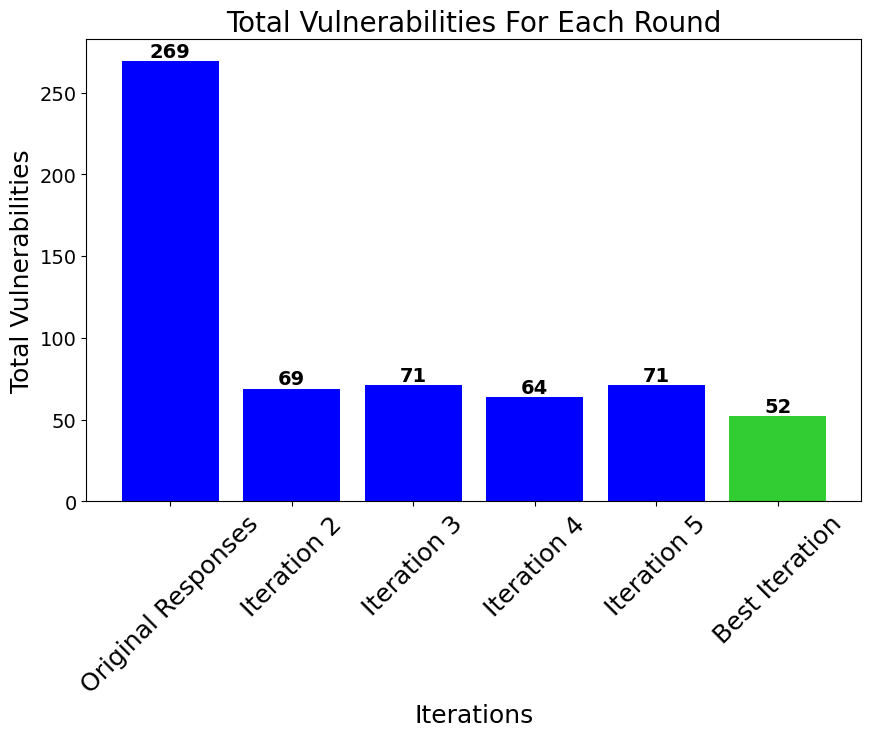

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

files = [
    "output_with_vulnerabilities_run1_f.csv",
    "output_with_vulnerabilities_run2_f.csv",
    "output_with_vulnerabilities_run3_f.csv"
]

columns_to_sum = [
    "Vulnerability Count 1", "Vulnerability Count 2", "Vulnerability Count 3",
    "Vulnerability Count 4", "Vulnerability Count 5", "Lowest Vulnerability Count"
]

dfs = [pd.read_csv(file) for file in files]
summed_values = sum(df[columns_to_sum].sum() for df in dfs)

colors = ['blue'] * (len(columns_to_sum) - 1) + ['LimeGreen']
x_labels = ["Original Responses", "Iteration 2", "Iteration 3", "Iteration 4", "Iteration 5", "Best Iteration"]

plt.figure(figsize=(10, 6))
bars = plt.bar(x_labels, summed_values, color=colors)

for bar, value in zip(bars, summed_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(value)),
             ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.xlabel("Iterations", fontsize=18)
plt.ylabel("Total Vulnerabilities", fontsize=18)
plt.title("Total Vulnerabilities For Each Round", fontsize=20)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=14)
plt.show()

In [2]:
cwe_columns = ["CWE 1", "Lowest CWE"]

def extract_cwe_counts(df, column):
    cwe_list = []
    for values in df[column].dropna():
        cwe_list.extend(map(str.strip, values.split(',')))
    return Counter(cwe_list)

cwe_counts = {col: Counter() for col in cwe_columns}

for file in files:
    df = pd.read_csv(file)
    for col in cwe_columns:
        cwe_counts[col].update(extract_cwe_counts(df, col))

all_cwes = sorted(set(cwe_counts["CWE 1"].keys()) | set(cwe_counts["Lowest CWE"].keys()))

cwe1_counts = {cwe: cwe_counts["CWE 1"].get(cwe, 0) for cwe in all_cwes}
lowest_cwe_counts = {cwe: cwe_counts["Lowest CWE"].get(cwe, 0) for cwe in all_cwes}

percentage_diff = {
    cwe: ((cwe1_counts[cwe] - lowest_cwe_counts[cwe]) / max(cwe1_counts[cwe], 1)) * 100
    for cwe in all_cwes
}

cwe_data = pd.DataFrame({
    "CWE Identifier": all_cwes,
    "First Iteration Count": [cwe1_counts[cwe] for cwe in all_cwes],
    "Best Iteration Count": [lowest_cwe_counts[cwe] for cwe in all_cwes],
    "% Difference": [percentage_diff[cwe] for cwe in all_cwes]
})

print(cwe_data)

  CWE Identifier  First Iteration Count  Best Iteration Count  % Difference
0             22                      8                     6        25.000
1            259                     35                     0       100.000
2            327                      1                     0       100.000
3            330                     39                     0       100.000
4            377                      6                     0       100.000
5             78                     64                    46        28.125
6             94                    116                     0       100.000
